In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 




from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# code to produce the summary data (.csv file) lives here: 
# /Users/floorbroekgaarden/Projects/GitHub/BlackHole-NeutronStar/otherCode/WriteRatesToCSV_EM.py

In [4]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']


In [18]:
def plotRatesLightestBHfirst(whichRate='intrinsic', ylims=[0,1]):#, CSVdir='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst'):
    
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5.5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    NSBHColour =  'blueviolet'
    
    nrDATAready = 15
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']

    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_BHBH_AllDCOsimulation.csv'
            else:
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_lightestFormsFirst.csv'
            
            ind_t = 1

            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'\textbf{fraction lightest BH formed 1st}'

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{m2 SN first}}$ '




            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_NSBH = rates


        rates_NSBH = rates_NSBH * (1./rates_BHNS)

        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_NSBH)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_NSBH)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
          
        elif MSSFRname=='231':
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif MSSFRname=='312': 
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
        else:
            COLOR= 'lightgray' 
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    #* 100 

        axe.plot(range(len(rates)), rates_NSBH, c=NSBHColour, lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_NSBH, c=NSBHColour, s=30,  zorder=zorder, alpha=ALPHA) 
        

        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
        ################
        # plot fiducial result with a star
        if ind_L==0:


            axe.scatter(range(len(rates))[0], rates_NSBH[0],\
                               c=NSBHColour, s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
    
    
            print('the fiducial ratio =', rates_NSBH[0])
            
            
            
            
            
      ################      

    minn, maxx = minRatio_BHNS, maxRatio_BHNS
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max

        
    axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
    xmin = -0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.001, 0.01, .1, 1]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#     axe.set_yscale('log')


    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])



#     handles, labels = axe.get_legend_handles_labels()
#     mask=[1,41, 13]

    plt.tight_layout()
    plt.savefig('./lightestBHFormsFirst_fraction_' +whichRate + '.png', dpi=600, transparent=False)
    plt.savefig('./lightestBHFormsFirst_fraction_' +whichRate + '.pdf', transparent=False) 
    
    plt.show()
    plt.close()

    return




the observed fiducial rate = 278.87649088232206
the observed fiducial rate = 219.00475288237888
the fiducial ratio = 0.7853109173508378


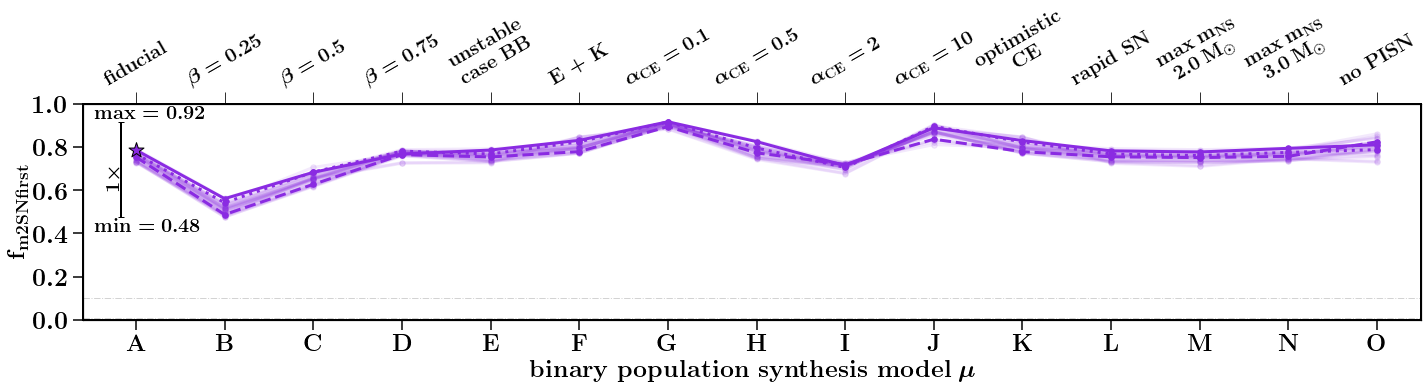

In [20]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1]
plotRatesLightestBHfirst(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

the intrinsic fiducial rate = 33.52050521653553
the intrinsic fiducial rate = 16.015303071664437
the fiducial ratio = 0.47777630343602795


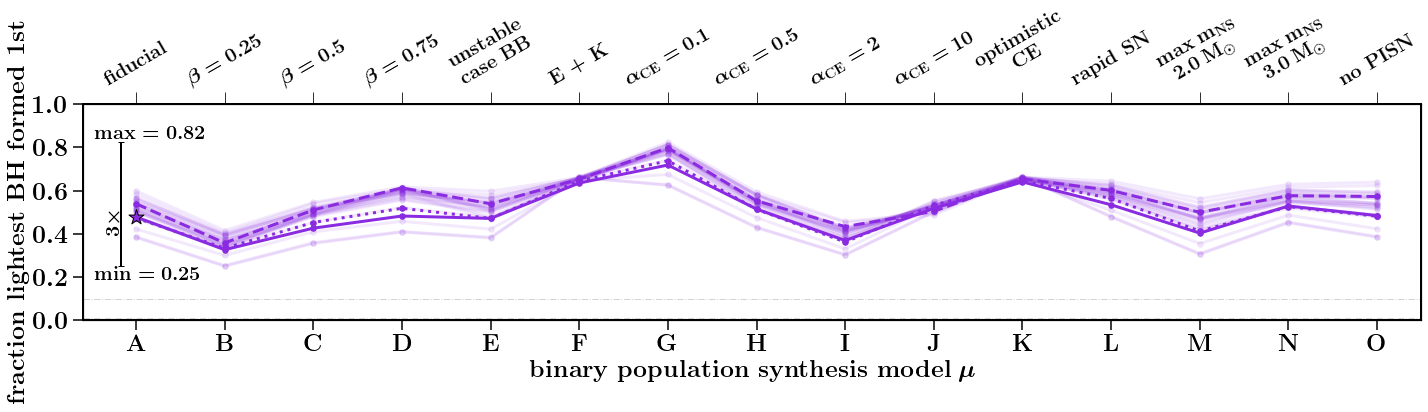

In [22]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1]
plotRatesLightestBHfirst(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)